In [ ]:
!pip install kmodes

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install folium matplotlib
import folium
!pip install geopy
from geopy.geocoders import Nominatim

In [ ]:
m = folium.Map(zoom_start = 6)

existing_dcs = [
    {'latitude': 35.393528, 'longitude': - 119.043732, 'name': 'Bakersfield, CA'},
    {'latitude': 38.2805, 'longitude': -104.4672, 'name': 'Pueblo, CO'},
    {'latitude': 44.979595, 'longitude': -93.276566, 'name': 'Woodbury, MN'},
    {'latitude': 40.028900, 'longitude': -77.590698, 'name': 'Chambersberg, PN'}
]

for location in existing_dcs:
    new_marker = folium.Marker(
        location=[location['latitude'], location['longitude']],
        popup=location['name'],
        icon=folium.Icon(color='red')
    )

    new_marker.add_to(m)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Target Upcurve/Project/DC_Planning.csv')

In [ ]:
df['latitude'] = df['geographic_loc'].str.extract(r'\((.*?),')[0].astype(float)
df['longitude'] = df['geographic_loc'].str.extract(r',(.*)\)', expand=False).astype(float)
df.head(5)

,guest_id,geographic_loc,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,state,country,latitude,longitude
0,G50029,"(41.9345228822601,-114.793454289252)",12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,Nevada,United States,41.934523,-114.793454
1,G39532,"(28.4114060271366,-98.0530295882411)",17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,Texas,United States,28.411406,-98.053030
2,G93168,"(37.8619825697659,-79.3247968858362)",9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,Virginia,United States,37.861983,-79.324797
3,G34201,"(33.1011843427186,-115.570115912097)",3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,California,United States,33.101184,-115.570116
4,G69749,"(49.0223887139561,-123.155574774425)",14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,British Columbia,Canada,49.022389,-123.155575


In [ ]:
df2 = df.drop(['guest_id','country','geographic_loc','state'],axis =1)

In [ ]:
df2.head(5)

,order_frequency,avg_order_value,Electronics,Clothing,Home Appliances,Books,Beauty,returns_rate,guest_segmentation,shipping_preferences,promotional_response,latitude,longitude
0,12.528133,9.092696,1,0,0,0,1,0.091774,Lapsed,Express,Medium,41.934523,-114.793454
1,17.571661,18.851202,1,1,0,0,0,0.300096,Repeat,Express,Low,28.411406,-98.053030
2,9.699606,47.468598,1,1,0,0,1,0.580670,Lapsed,Express,Low,37.861983,-79.324797
3,3.407187,10.747374,0,0,1,0,1,0.526972,New,Same-day,Medium,33.101184,-115.570116
4,14.276042,3.441740,1,1,1,0,0,0.562618,Repeat,Express,Low,49.022389,-123.155575


In [ ]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder

numerical_cols = ['order_frequency','returns_rate']
# scaler = StandardScaler()
# df2[numerical_cols] = scaler.fit_transform(df2[numerical_cols])


In [ ]:
categorical_cols = ['shipping_preferences','promotional_response']
# encoder = LabelEncoder()
# df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])
encoder = OrdinalEncoder()
df2[categorical_cols] = encoder.fit_transform(df2[categorical_cols])


In [ ]:
# df2[categorical_cols]

In [ ]:
combined_features = numerical_cols + categorical_cols
combined_features

['order_frequency',
 'returns_rate',
 'shipping_preferences',
 'promotional_response']

In [ ]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12059, ncost: 2687232.1614141003
Run: 1, iteration: 2/100, moves: 6325, ncost: 2485819.200563969
Run: 1, iteration: 3/100, moves: 3202, ncost: 2447593.8303837012
Run: 1, iteration: 4/100, moves: 1351, ncost: 2440028.070978784
Run: 1, iteration: 5/100, moves: 740, ncost: 2437104.902943074
Run: 1, iteration: 6/100, moves: 496, ncost: 2435628.799580284
Run: 1, iteration: 7/100, moves: 377, ncost: 2434759.1717954427
Run: 1, iteration: 8/100, moves: 277, ncost: 2434297.5520711867
Run: 1, iteration: 9/100, moves: 185, ncost: 2434083.829280231
Run: 1, iteration: 10/100, moves: 146, ncost: 2433961.897988679
Run: 1, iteration: 11/100, moves: 79, ncost: 2433923.2702490482
Run: 1, iteration: 12/100, moves: 51, ncost: 2433904.551572205
Run: 1, iteration: 13/100, moves: 31, ncost: 2433897.529731707
Run: 1, iterat

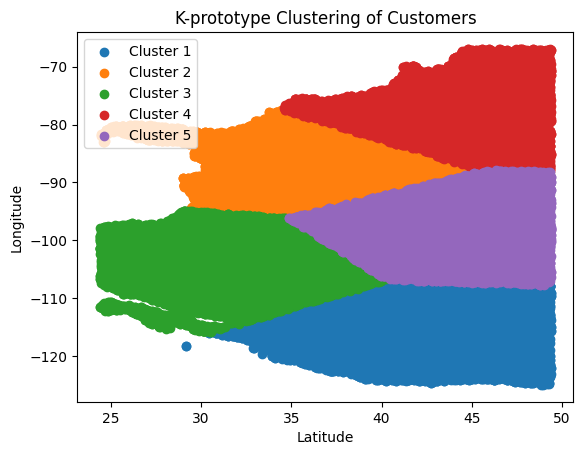

In [ ]:
selected_features1 = ['latitude','longitude','order_frequency','returns_rate','shipping_preferences']
k = 5
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features1].values, categorical=[4])
df2['cluster1'] = clusters

for cluster_num in range(k):
    cluster_data = df2[df2['cluster1'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [ ]:
m1 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster1'].unique():
    cluster_data = df2[df2['cluster1'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker1 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='blue')
    )

    marker1.add_to(m)
    marker1.add_to(m1)
m1

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11602, ncost: 2800578.1188456723
Run: 1, iteration: 2/100, moves: 6823, ncost: 2615370.402883922
Run: 1, iteration: 3/100, moves: 4467, ncost: 2512785.9310545796
Run: 1, iteration: 4/100, moves: 3289, ncost: 2461605.0706826495
Run: 1, iteration: 5/100, moves: 2077, ncost: 2443882.753843561
Run: 1, iteration: 6/100, moves: 1243, ncost: 2437945.53280002
Run: 1, iteration: 7/100, moves: 866, ncost: 2435168.3072680812
Run: 1, iteration: 8/100, moves: 514, ncost: 2434276.7481870446
Run: 1, iteration: 9/100, moves: 331, ncost: 2433786.488027707
Run: 1, iteration: 10/100, moves: 231, ncost: 2433602.030647858
Run: 1, iteration: 11/100, moves: 113, ncost: 2433550.7345723943
Run: 1, iteration: 12/100, moves: 36, ncost: 2433544.1019093385
Run: 1, iteration: 13/100, moves: 12, ncost: 2433542.976277138
Run: 1, it

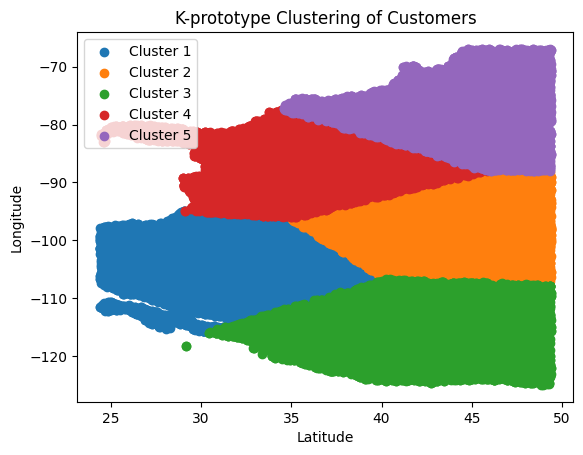

In [ ]:
selected_features2 = ['latitude','longitude','order_frequency','returns_rate','promotional_response']
k = 5
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features2].values, categorical=[4])
df2['cluster2'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster2'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [ ]:
#map
m2 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=6)
for cluster in df2['cluster2'].unique():
    cluster_data = df2[df2['cluster2'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker2 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='green')
    )

    marker2.add_to(m)
    marker2.add_to(m2)
m2

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12097, ncost: 2662442.618271755
Run: 1, iteration: 2/100, moves: 5252, ncost: 2557521.6157481303
Run: 1, iteration: 3/100, moves: 2112, ncost: 2540181.317041262
Run: 1, iteration: 4/100, moves: 1036, ncost: 2535115.499356725
Run: 1, iteration: 5/100, moves: 604, ncost: 2533204.3442571443
Run: 1, iteration: 6/100, moves: 330, ncost: 2532569.5926593826
Run: 1, iteration: 7/100, moves: 195, ncost: 2532350.318660375
Run: 1, iteration: 8/100, moves: 115, ncost: 2532279.5661362493
Run: 1, iteration: 9/100, moves: 62, ncost: 2532260.820310078
Run: 1, iteration: 10/100, moves: 30, ncost: 2532256.741570708
Run: 1, iteration: 11/100, moves: 8, ncost: 2532256.3522903486
Run: 1, iteration: 12/100, moves: 3, ncost: 2532256.2789046415
Run: 1, iteration: 13/100, moves: 3, ncost: 2532256.2126738904
Run: 1, iteration

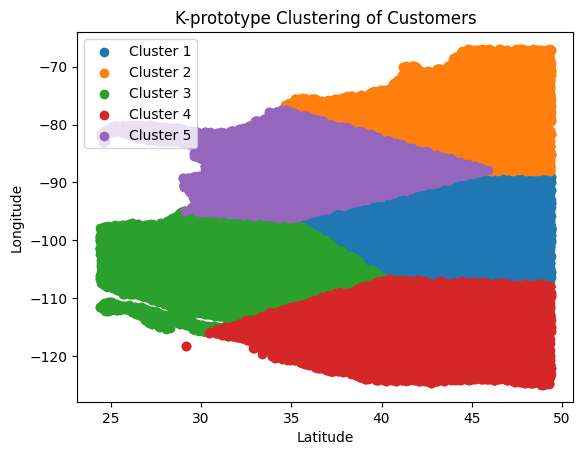

In [ ]:
selected_features3 = ['latitude','longitude','order_frequency','returns_rate','shipping_preferences','promotional_response']
k = 5
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features3].values, categorical=[4,5])

#scatterplot
df2['cluster3'] = clusters
for cluster_num in range(k):
  cluster_data = df2[df2['cluster3'] == cluster_num]
  plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers')
plt.legend()
plt.show()

In [ ]:
#map
m3 = folium.Map(location=[df2['latitude'].mean(), df2['longitude'].mean()], zoom_start=6)
for cluster in df2['cluster3'].unique():
    cluster_data = df2[df2['cluster3'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker3 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='orange')
    )

    marker3.add_to(m)
    marker3.add_to(m3)
m3

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 8344, ncost: 2505966.2190646157
Run: 1, iteration: 2/100, moves: 2558, ncost: 2479543.566834909
Run: 1, iteration: 3/100, moves: 1398, ncost: 2471205.666799397
Run: 1, iteration: 4/100, moves: 922, ncost: 2467453.2729723207
Run: 1, iteration: 5/100, moves: 610, ncost: 2465819.017168258
Run: 1, iteration: 6/100, moves: 379, ncost: 2465076.393272055
Run: 1, iteration: 7/100, moves: 261, ncost: 2464710.1032191245
Run: 1, iteration: 8/100, moves: 172, ncost: 2464543.5208434653
Run: 1, iteration: 9/100, moves: 102, ncost: 2464479.935980529
Run: 1, iteration: 10/100, moves: 65, ncost: 2464451.5765447845
Run: 1, iteration: 11/100, moves: 56, ncost: 2464434.568923345
Run: 1, iteration: 12/100, moves: 28, ncost: 2464429.4820571453
Run: 1, iteration: 13/100, moves: 15, ncost: 2464428.276423701
Run: 1, iteratio

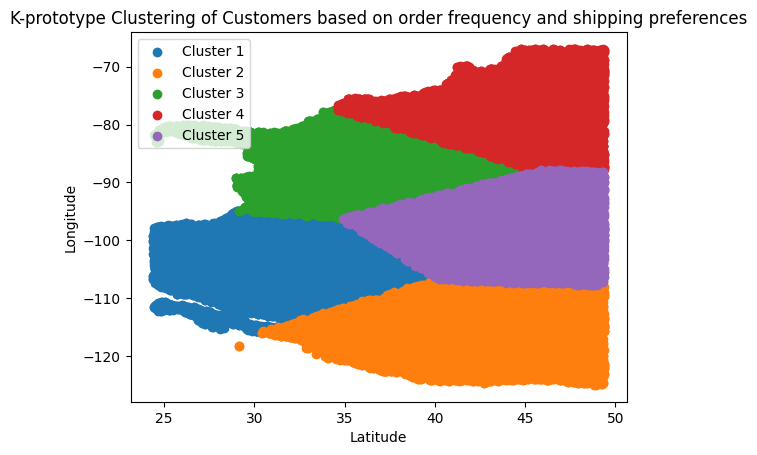

In [ ]:
selected_features4 = ['latitude','longitude','order_frequency','shipping_preferences']
k = 5
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features4].values, categorical=[3])
df2['cluster4'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster4'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency and shipping preferences')
plt.legend()
plt.show()

In [ ]:
#map

m4 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster4'].unique():
    cluster_data = df2[df2['cluster4'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]

    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker4 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='darkgreen')
    )

    marker4.add_to(m)
    marker4.add_to(m4)
m4

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 11394, ncost: 2965036.972719874
Run: 1, iteration: 2/100, moves: 6206, ncost: 2788940.7764374427
Run: 1, iteration: 3/100, moves: 3857, ncost: 2722599.212510226
Run: 1, iteration: 4/100, moves: 3161, ncost: 2654380.4077280983
Run: 1, iteration: 5/100, moves: 2937, ncost: 2610463.4072128595
Run: 1, iteration: 6/100, moves: 2401, ncost: 2575578.8023547265
Run: 1, iteration: 7/100, moves: 2606, ncost: 2523604.505872598
Run: 1, iteration: 8/100, moves: 2061, ncost: 2500645.391991963
Run: 1, iteration: 9/100, moves: 1478, ncost: 2488270.1346957656
Run: 1, iteration: 10/100, moves: 1179, ncost: 2479631.2681578347
Run: 1, iteration: 11/100, moves: 906, ncost: 2474421.553533827
Run: 1, iteration: 12/100, moves: 797, ncost: 2470350.132685183
Run: 1, iteration: 13/100, moves: 633, ncost: 2467902.9413949875
Run

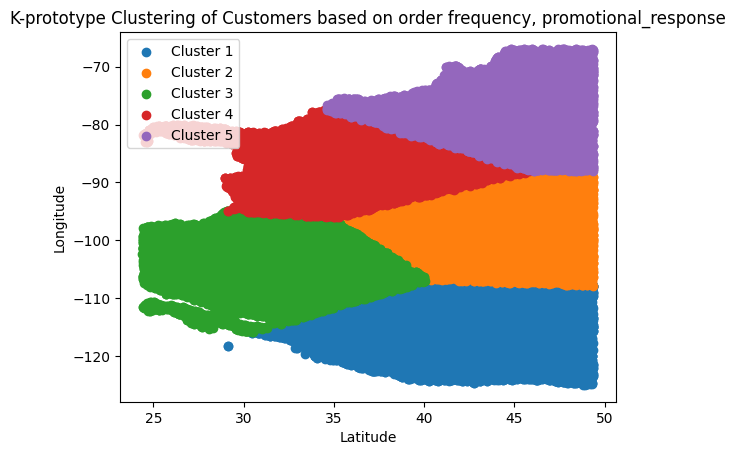

In [ ]:
selected_features5 = ['latitude','longitude','order_frequency','promotional_response']
k = 5
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features5].values, categorical=[3])
df2['cluster5'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster5'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency, promotional_response')
plt.legend()
plt.show()

In [ ]:
#map
m5 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster5'].unique():
    cluster_data = df2[df2['cluster5'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]


    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')
    marker5 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='lightgray')
    )

    marker5.add_to(m)
    marker5.add_to(m5)
m5

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 12510, ncost: 2651003.02554191
Run: 1, iteration: 2/100, moves: 3822, ncost: 2608482.756036115
Run: 1, iteration: 3/100, moves: 1519, ncost: 2600743.3576077563
Run: 1, iteration: 4/100, moves: 841, ncost: 2597424.8320784485
Run: 1, iteration: 5/100, moves: 566, ncost: 2595734.6728956425
Run: 1, iteration: 6/100, moves: 369, ncost: 2594956.6393299093
Run: 1, iteration: 7/100, moves: 221, ncost: 2594674.5548991114
Run: 1, iteration: 8/100, moves: 135, ncost: 2594579.608239757
Run: 1, iteration: 9/100, moves: 111, ncost: 2594514.370650732
Run: 1, iteration: 10/100, moves: 51, ncost: 2594497.66077801
Run: 1, iteration: 11/100, moves: 16, ncost: 2594496.686730165
Run: 1, iteration: 12/100, moves: 9, ncost: 2594496.0503219934
Run: 1, iteration: 13/10

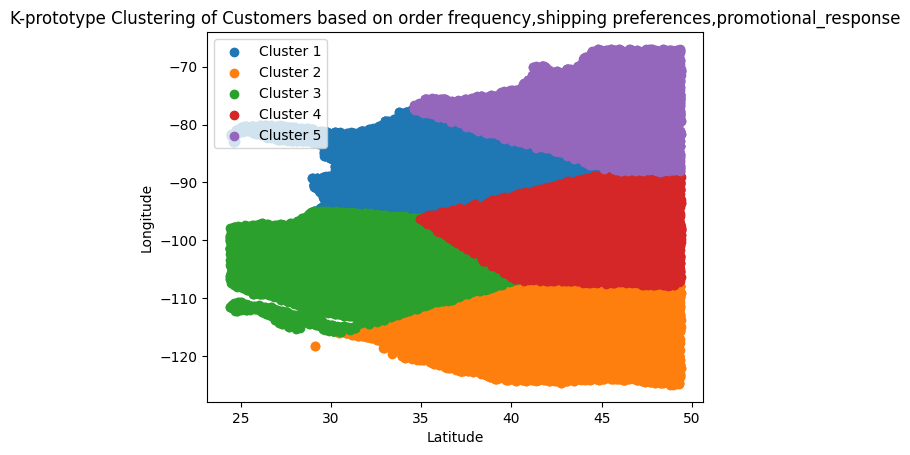

In [ ]:
selected_features6 = ['latitude','longitude','order_frequency','shipping_preferences','promotional_response']
k = 5
kproto = KPrototypes(n_clusters=k,verbose = 1)
clusters = kproto.fit_predict(df2[selected_features6].values, categorical=[3,4])
df2['cluster6'] = clusters

#scatterplot
for cluster_num in range(k):
    cluster_data = df2[df2['cluster6'] == cluster_num]
    plt.scatter(cluster_data['latitude'], cluster_data['longitude'], label=f'Cluster {cluster_num + 1}')

plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('K-prototype Clustering of Customers based on order frequency,shipping preferences,promotional_response')
plt.legend()
plt.show()



In [ ]:
#map
m6 = folium.Map( location=[df2['latitude'].mean(), df2['longitude'].mean()],zoom_start=6)
for cluster in df2['cluster6'].unique():
    cluster_data = df2[df2['cluster6'] == cluster]
    cluster_center = [cluster_data['latitude'].mean(), cluster_data['longitude'].mean()]


    geolocator = Nominatim(user_agent="city-extraction")
    location = geolocator.reverse(cluster_center, exactly_one=True)
    address = location.raw.get('address', {})
    location_name = address.get('state', '')

    marker6 = folium.Marker(
        location=cluster_center,
        popup=f'{location_name}',
        icon=folium.Icon(color='yellow')
    )

    marker6.add_to(m)
    marker6.add_to(m6)
m6

<ipython-input-24-a267ca4c2baa>:16: UserWarning: color argument of Icon should be one of: {'cadetblue', 'lightgray', 'gray', 'blue', 'green', 'beige', 'red', 'darkblue', 'orange', 'darkpurple', 'lightred', 'lightblue', 'white', 'purple', 'lightgreen', 'pink', 'darkgreen', 'black', 'darkred'}.
  icon=folium.Icon(color='yellow')


In [ ]:
m